# Lab - Multi-class Classification Techniques (Guide)


🛑 👉 To complete this lab, you will need to download the dataset to your computer. It's hosted on Github at this link: https://github.com/jennifer-fowler/NationalAICampus/blob/main/Debernardi-data.csv

Multiclass classification is a technique to assign all samples in a dataset to one of two or more classes. For example, analysis of a dataset of pictures of different types of fruit, where each image may either be of an orange, an apple, or a pear. Each image is one sample and is labeled as one of the 3 possible classes. Multiclass classification makes the assumption that each sample is assigned to one and only one label - one sample cannot, for example, be both a pear and an apple.

In this lab, we will implement and compare various classification techniques to a dataset from a cancer study.

###About the Dataset:
This dataset comes to us from [Kaggle -link-](https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer) and is from a study on pancreatic cancer. Pancreatic cancer is an extremely deadly type of cancer. However, if pancreatic cancer is caught early, the odds of surviving are much better. Unfortunately, many cases of pancreatic cancer show no symptoms until the cancer has spread throughout the body. In a paper by Debernardi and colleagues published in PLOS Medicine, a team of researchers sought to develop an accurate diagnostic test for the most common type of pancreatic cancer, called pancreatic ductal adenocarcinoma or PDAC. They gathered a series of biomarkers from the urine of three groups of patients. 

From the data dictionary:
* `sample_origin`: BPTB: Barts Pancreas Tissue Bank, London, UK; ESP: Spanish National Cancer Research Centre, Madrid, Spain; LIV: Liverpool University, UK; UCL: University College London, UK
* `diagnosis`: 1 = Control or healthy, 2 = Benign, 3 = PDAC, or cancer)
* `stage`: For those with pancratic cancer, what stage was it? One of IA, IB, IIA, IIIB, III, IV
* `benign_sample_diagnosis`: For those with a benign, non-cancerous diagnosis, what was the diagnosis?
* `creatinine`: Urinary biomarker of kidney function
* `LYVE1`: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
* `REG1B`: Urinary levels of a protein that may be associated with pancreas regeneration.
* `TFF1`: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract

-------
This lab was developed by Jennifer Fowler (https://github.com/jennifer-fowler).

*Note:* If you are not familiar with Colab or Jupyter Notebooks, we recommended that you participate in a Colab or Jupyter Notebook tutorial to understand how to use the environment. This notebook does not have guidance on the basic operation of the environment.

* Video overview of Google Colab: https://youtu.be/NUJMprxho5o

* Colab tutorial: https://colab.research.google.com/notebooks/basic_features_overview.ipynb 

* Jupyter Notebook Beginner's Guide: https://www.dataquest.io/blog/jupyter-notebook-tutorial/ 


###Legend:

⏸ This symbol is for Detours, supplemental info in case you want it.

🏀 This symbol means it's your turn to play ball and type some code.


In [178]:
# Setup- importing packages we will use for this project.
# Note that we can abbreviate package names for shorter commands- below are some commonly used abbreviations
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## ⏸ Uploading a file to Google Colab

In this lab, we will utilize Colab's storage feature and upload the dataset that we will analyze. To do this, you click the file folder icon on the left navigation panel of the Colab environment (below in orange). When you click it, a panel should display that has some additional options.

To complete this lab, you will need to download the dataset to your computer. It's hosted on Github at this link: https://github.com/jennifer-fowler/NationalAICampus/blob/main/Debernardi-data.csv

There are two ways to upload the csv file:
1. Click the button to Upload a file to session storage, which will open a file 
explorer window on your computer and allow you to select the file and click "Open"
2. Open a file explorer window and navigate to where the file is stored, then drag and drop it into the Colab environment.

After it's uploaded, hover your mouse over the file and click the little three dots on the right to copy the file path, then paste it into the code cell below.

Here's a short video that demonstrates both options: https://youtu.be/U_-Zlv0msXQ

In [179]:
#import the data file by pasting the file path in the quotation marks below
df = pd.read_csv('/content/Debernardi-data.csv')

## 📌 The Assignment
This lab will walk you through how to analyze the dataset and build a model that will predict the patient's diagnosis and stage based on the available features.

Here are the steps we will take:

1. Perform exploratory data analysis to learn more about the dataset. 
2. Choose features to use as the predictor/x and response/y.
3. Split the data into testing and training sets.
4. Implement three classification models on the training data and make predictions on the testing data.
5. Compare the accuracy of the models and discuss the results.


### Step 1- Exploratory Data Analysis

Exploratory data analysis (EDA) is a critical component of any data science project. Without it, analytical results can be meaningless. EDA often begins with some simple functions to get a better understanding of what the dataset itself contains, its size and shape, what kind of variables are included, and some preliminary visualizations. 

In [ ]:
# Exploratory data analysis
# print the shape of the dataset to see how many rows and columns there are
print(df.shape)

In [ ]:
#print the list of column names for easy reference later on
print(df.columns, len(df.columns))

In [ ]:
#look at the data using the .head() function
df.head()

### Pre-processing & Feature Selection
Looking at the data, we see there are some NaN values (missing data). We can use some simple commands to get a better idea of exactly how much data is missing, and how that may impact our analysis.

In [ ]:
# we can use .isnull() to see which columns have missing data 
# and .sum() to see how many missing values there are
df.isnull().sum()

The columns labeled 'stage' and 'benign_sample_diagnosis' appear to have lots of missing data. In this case, we don't want to remove those rows from the dataset because the healthy patients are included as a control group in the experiment. Healthy patients won't have any data under 'stage', which indicates the stage of cancer. Many patients may also have missing values for 'benign_sample_diagnosis' if they did not have any samples to diagnose. To preserve this data without triggering errors in regression analyses, we can use placeholders to fill the missing values.

In [ ]:
# fill the missing values in the 'stage' and 'benign_sample_diagnosis' columns using .fillna()
# assign a string to indicate that the patient had no stage of cancer or no samples to diagnose
df['stage'] = df['stage'].fillna('healthy')
df['benign_sample_diagnosis'] = df['benign_sample_diagnosis'].fillna('none')

# Checking columns with missing values again
df.isnull().sum()

## Visualizing the Data

A box plot (or box-and-whisker plot) is a great tool for understanding relationships between numerical values and categorical values. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers.”

Basically, an ideal boxplot would show larger boxes (indicating lower variance or distribution of values in a given feature) with small whiskers and few or no outliers.

We can produce a few boxplots to get a look at the distribution of values for each diagnostic category. 

In [ ]:
# Use seaborn .catplot() function to produce boxplots
# and explore the relationships of the biomarkers and diagnosis

sns.catplot(x="diagnosis", y="TFF1", data=df, kind="box", aspect=1.5)
plt.title("Distribution of TFF1 Measurements vs. Diagnosis")
plt.show()

In [ ]:
# Use seaborn .catplot() function to produce boxplots
# and explore the relationships of the biomarkers and diagnosis

sns.catplot(x="diagnosis", y="creatinine", data=df, kind="box", aspect=1.5)
plt.title("Distribution of Creatinine Measurements vs. Diagnosis")
plt.show()

In [ ]:
# Use seaborn .catplot() function to produce boxplots
# and explore the relationships of the biomarkers and diagnosis

sns.catplot(x="diagnosis", y="LYVE1", data=df, kind="box", aspect=1.5)
plt.title("Distribution of LYVE1 Measurements vs. Diagnosis")
plt.show()

## EDA Results

After reviewing the boxplots, which of the 3 biomarkers (TFF1, LYVE1, and Creatinine) has the least amount of variance? You can estimate this visually by comparing values on the y-axis of the plots. The plot for TFF1 has y-values ranging from 0 to about 14,000, with lots of points outside of the distribution boxes (outliers). The plot for LYVE1 has very few outliers for diagnosis categories 2 and 3, but does have many outliers for category 1.

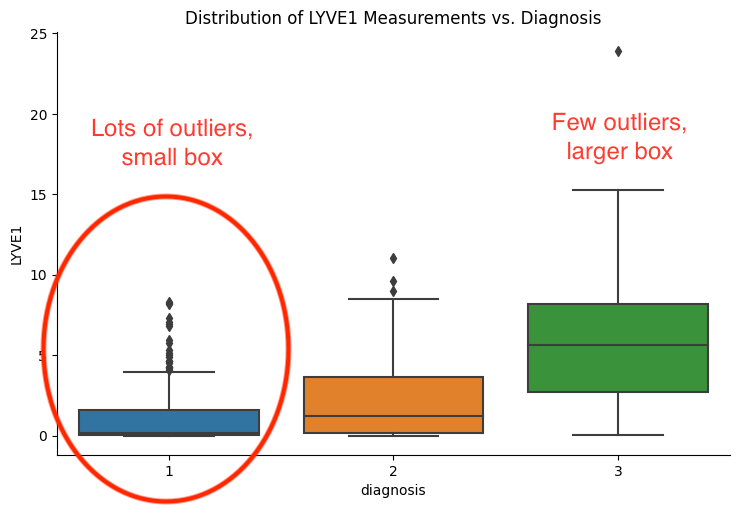

The creatinine boxplot has larger boxes and fewer outliers across all diagnosis categories. 

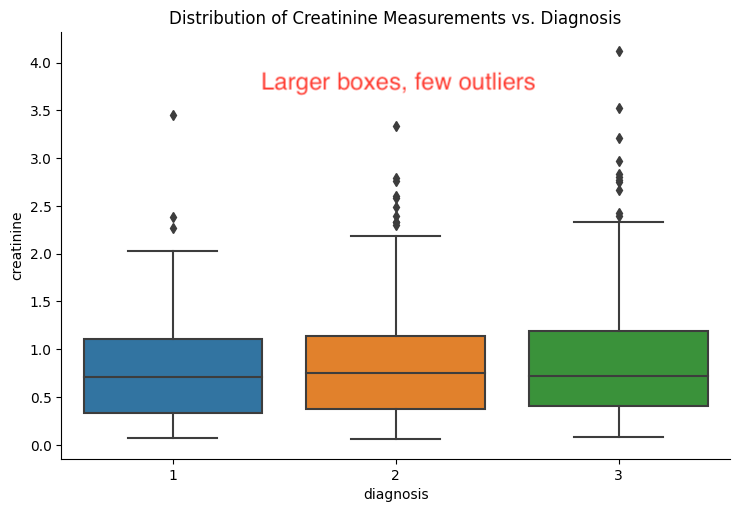

The exploratory data analysis of this dataset shows that this is a relatively small dataset with lots of variance in the possible predictors, but the classes are relatively balanced. It might be difficult to get accurate prediction models because of the variance and size of the dataset, so let's proceed with investigating LYVE1 and creatinine in the rest of the lab.

In [188]:
# assign 'diagnosis' as the y/response/target variable
y = df['diagnosis']

# assign LYVE1 and creatinine as predictors
x = df[['LYVE1', 'creatinine']]

## Train - Test Split

Splitting a dataset into training and testing portions or subsets are critical in order to validate the performance of a model and the accuracy of its predictions. Some models can do this automatically without the need for a separate step, but in this case since we are comparing performance across three models, we want them to use the exact same training and testing data.

We will use sklearn's `train_test_split()` in this lab and give it a random_state parameter to make it easier to reproduce the same results when different people run the task.

In [189]:
# split into testing and training sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=23)

## Classifiers

The three classifiers we will test and compare each operate a bit differently. 

1. K-Nearest Neighbors classifier
2. Stochastic Gradient Descent classifier
3. AdaBoost + Random Forest Ensemble Classifer

### k-Nearest Neighbors (KNN)

The k-Nearest Neighbors (KNN) model that is available in Scikit-Learn as the `sklearn.neighbors.KNeighborsClassifier`. KNN models classify new examples by finding some "nearby" examples from the training dataset, then allows these _nearest neighbors_ to vote on the label that should be applied.  The idea is that new items are probably more like the items that are closest to them (in "feature space"). 

The parameter $k$ (which Scikit-Learn calls `n_neighbors`) determines how many neighbors are allowed to participate in determining the label.  It is the most important _tunable parameter_ for this model.  Choosing too small a value for $k$ will make the results suceptable to noise, but too large a value can misclassify values near the "edges" of a neighborhood if it sits near items from another class.



In [191]:
# Let's declare a KNN model (we'll use `n_neighbors` = 3 for this example)
knc = KNeighborsClassifier(n_neighbors = 3)

# fit it to the training data
k1 = knc.fit(X_train, y_train)

### Stochastic Gradient Descent classifier

Stochastic Gradient Descent (SGD) is a simple and powerful optimization training approach to fitting linear classifiers and regressors in combination with other analytical and predictive functions. 

For example, using `SGDClassifier` with parameter `(loss='log_loss')` results in logistic regression, i.e. a model equivalent to `LogisticRegression` which is fitted via SGD instead of being fitted by one of the other solvers in LogisticRegression. Similarly, `SGDRegressor(loss='squared_error', penalty='l2')` and Ridge solve the same optimization problem in different ways.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. SGD has advantages of being efficient and easy to apply, but can be over-sensitive to scaling or over-tuning.

Let's try out using the `modified_huber` parameter for loss, which adds tolerance for outliers.

In [192]:
#define a stochastic gradient descent classifier with a random state parameter
sgdc = SGDClassifier(loss= 'modified_huber', random_state = 14)

#fit it to the training data
s1 = sgdc.fit(X_train, y_train)

### AdaBoost + Decision Tree Ensemble Classifer

The core principle of AdaBoost is to fit a sequence of models that are only slightly better than random guessing, such as small decision trees, on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. AdaBoost can be used both for classification and regression problems.

`AdaBoostClassifier` is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

The default starting estimator or model for `AdaBoostClassifier` is sklearn's `DecisionTreeClassifier`, which is what we will use. 

In [193]:
# define an AdaBoostClassifier with a random state parameter
abc = AdaBoostClassifier(random_state = 14)

#fit it to the training data
abc1 = abc.fit(X_train, y_train)

## Making Predictions

Now that we have the three classifier models trained on the training data for both creatinine and LYVE1, it's time to put the reserved testing data to use. 



Accuracy of the classification models can be examined with a variety of metrics, all revolving around comparisons of the model's predicted category for each observation with the actual category for that observation. The 'actual' values are often referred to as the gold standard or the ground truth.

In [194]:
## make predictions on the testing data with each model
# first using the KNN Classifier
k1pred = k1.predict(X_test)

# now make predictions with the SGD classifier
s1pred = s1.predict(X_test)

# and finally the AdaBoost Classifier
abc1pred = abc1.predict(X_test)

##Measure the performance of the predictions
Now we want to see how we did... Let's look at the information in a few different ways. The first is to create something called a "confusion matrix". Although the name is a bit odd, the idea is simple: For each possible class, we want to know how often the model predicted test samples with that class correctly or incorrectly. 

The confusion matrix will create a row for each of the true labels, and a column for each of the predicted labels, with counts for every possible combination of labelings (correct labelings are along the main diagonal).

We can quickly examine counts and generate a nice visualization by using the `sklearn.metrics.ConfusionMatrixDisplay()` function. Check the References cell for the link to the documentation about this package.

In [ ]:
# use ConfusionMatrixDisplay() to plot and show the matrix for KNN model
ConfusionMatrixDisplay.from_predictions(y_test, k1pred)
plt.title("KNN Classifier Predictions")
plt.show()

In [ ]:
# use ConfusionMatrixDisplay() to plot and show the matrix for SGD model
ConfusionMatrixDisplay.from_predictions(y_test, s1pred)
plt.title("SGD Classifier Predictions")
plt.show()

In [ ]:
# use ConfusionMatrixDisplay() to plot and show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, abc1pred)
plt.title("AdaBoost Classifier Predictions")
plt.show()

## The Results

What do you think about these results? The confusion matrix for each model showed predictions and true categories for each row in the testing data, but they are all different. 

A confusion matrix for a very accurate model should have a strong diagonal line, starting in the top left corner and moving toward the bottom right, with few or no mis-classified results. Here's an example from sklearn that demonstrates this concept: 

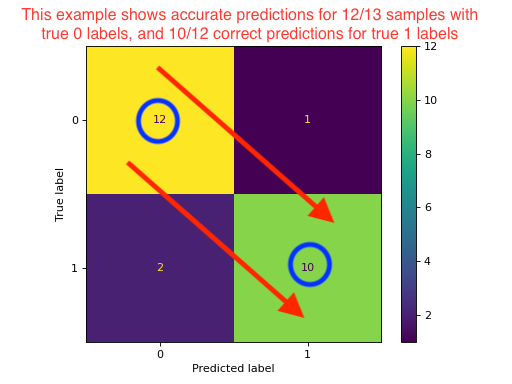

Let's generate some additional evaluation metrics for the three models using sklearn's `classification_report` tool, which will give us the precision and recall scores. 

In [ ]:
# print the classification report for the KNN model
print("KNN Classifier Report:")
print(classification_report(y_test, k1pred))
                            

In [ ]:
# print the classification report for the SGD model
print("SGD Classifier Report:")
print(classification_report(y_test, s1pred))

In [ ]:
# print the classification report for the AdaBoost model
print("AdaBoost Classifier Report:")
print(classification_report(y_test, abc1pred))

## Discussion

It appears that this dataset is either too small to make effective predictions, or the features included are simply not effective measurements to predict the diagnosis of each patient. One way we can get some more insight on this is by training the model on the whole dataset, then asking it to predict response values for the whole dataset, without reserving any data for testing. 

Let's try it out with the K-Nearest Neighbors Classifier and see what happens. If the model is effective, we should see close to 100% accuracy since we are exposing all of the true labels to the model as it learns. That means a strong, bright diagonal line with very few mis-classifications.

In [ ]:
#fit the knc model to all x and y values
k2 = knc.fit(x, y)

#make predictions on all x values
k2pred = k2.predict(x)

# compare predicted y with all true y values
ConfusionMatrixDisplay.from_predictions(y, k2pred)
plt.title("KNN Classifier Predictions")
plt.show()

# print the classification report
print(classification_report(y, k2pred))

## Conclusion

So even when the model can 'see' all of the 'answers' or true categories for each row in the dataset, it still doesn't reach 100% accuracy, though it did get much closer. 

What changes could we make, or parameters could we tune, to try to improve performance on this dataset? What other relationships and features could we explore?

#References and Other Resources

* Debernardi pancreatic cancer dataset from Kaggle: https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

* NumPy docs: https://numpy.org/

* Pandas docs: https://pandas.pydata.org/

* SciKit Learn docs: https://scikit-learn.org/stable/

* Pandas .isnull(): https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

* seaborn boxplots: https://seaborn.pydata.org/generated/seaborn.boxplot.html

* SGDClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

* AdaBoostClassifer: https://scikit-learn.org/stable/modules/ensemble.html#adaboost

* KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

* ConfusionMatrixDisplay: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

* Classification_report: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report